## The question I have is: "What factors contribute to a better GPA for my kids?"

Import necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
stud_df = pd.read_csv('data/Student_performance_data.csv')

In [2]:
stud_df.drop(['StudentID','Ethnicity','Gender','Age'],axis=1,inplace=True)

Start off with a heatmap correlation of the dataset.

<Axes: >

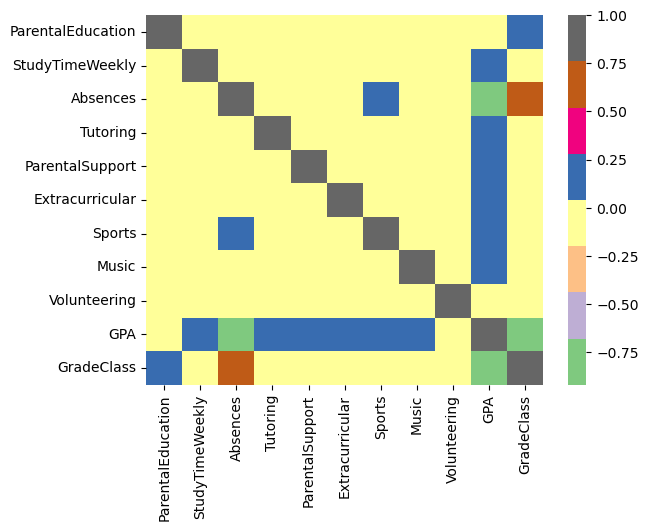

In [3]:
sns.heatmap(stud_df.corr(),cmap='Accent')

# Looking at some of the correlations, GPA has a slight correlation with study time, tutoring, parental support, and extracurricular.

# GPA is heavily correlated with absences.
Looking at absences, I want to see what students with a high absence rate have in common to see if there is a reasoning for the absences and the GPA of students who have majority absences.

I will determine the students who are absent outside one standard deviation of the mean.

In [4]:
print(stud_df['Absences'].mean()+stud_df['Absences'].std())

23.0088053397836


Students who have above 23 absences are outside the standard deviation. I want a dataframe of only those students to see what their data looks like.

Then I will make a dataframe of the students that are not over the standard deviation of absences and make a graph to compare the GPA between the two.

0.7831103709390631
2.239152446188736


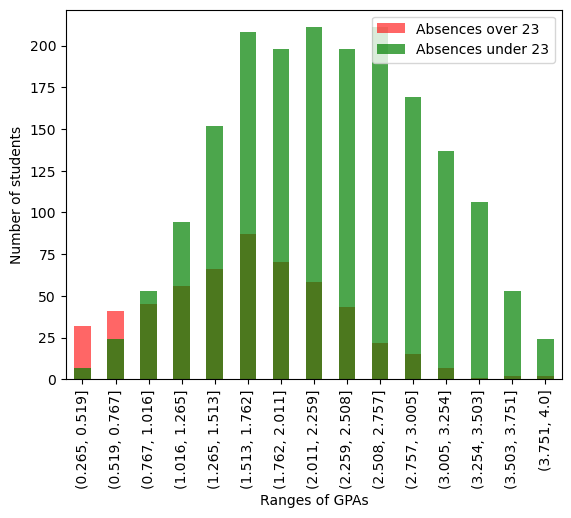

In [5]:
sev_abs_df = stud_df[stud_df['Absences'] >= 23]
print(sev_abs_df['GPA'].mean())
notsev_abs_df = stud_df[stud_df['Absences'] < 23]
print(notsev_abs_df['GPA'].mean())
#how to get them both side by side.
sev_abs_df['GPA'].value_counts(bins=15).sort_index().\
    plot(use_index=True, kind='bar',sharex=True,sharey=True,color='Red',alpha=.6)
notsev_abs_df['GPA'].value_counts(bins=15).sort_index().\
    plot(use_index=True,kind='bar',sharex=True,sharey=True,alpha=.7,color='Green')
plt.ylabel('Number of students')
plt.xlabel('Ranges of GPAs')
plt.legend(['Absences over 23','Absences under 23'])

The mean GPA for students who were absent over the std, is 0.78. Do the students who are majority absent have less parental support? What could I as a parent do to ensure my child is in the classes?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

Text(0, 0.5, 'Aggregated Mean of Each Feature')

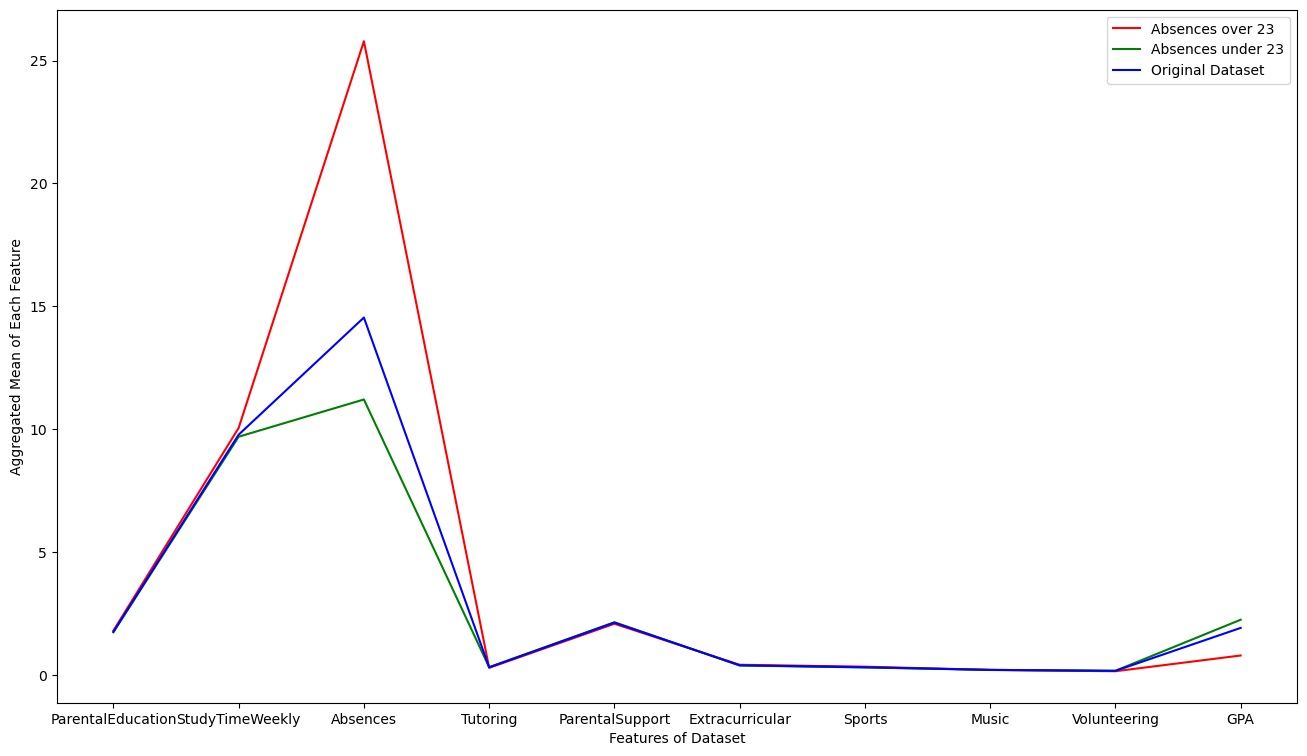

In [6]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(sev_abs_df.agg('mean').drop('GradeClass'),color='Red')
sns.lineplot(notsev_abs_df.agg('mean').drop('GradeClass'),color='Green')
sns.lineplot(stud_df.agg('mean').drop('GradeClass'),color='Blue')
ax.legend(handles=ax.lines, labels=['Absences over 23','Absences under 23','Original Dataset'])
ax.set_xlabel('Features of Dataset')
ax.set_ylabel('Aggregated Mean of Each Feature')

Surprisingly there seems to be little difference in the other features the dataset covers that would explain absences.

# Now I want to take a look at students performing above the standard deviation from the mean.

In [7]:
stud_df['GPA'].mean()+stud_df['GPA'].std()

2.8213421230515006

In [8]:
high_gpa_df = stud_df[stud_df['GPA'] >= 2.82]
lower_gpa_df = stud_df[stud_df['GPA'] <= 2.82]
print(high_gpa_df.agg('mean'))
print(lower_gpa_df.agg('mean'))

ParentalEducation     1.705215
StudyTimeWeekly      11.424612
Absences              3.528345
Tutoring              0.428571
ParentalSupport       2.455782
Extracurricular       0.460317
Sports                0.324263
Music                 0.258503
Volunteering          0.156463
GPA                   3.220271
GradeClass            1.179138
dtype: float64
ParentalEducation     1.755510
StudyTimeWeekly       9.398437
Absences             17.030753
Tutoring              0.272681
ParentalSupport       2.046643
Extracurricular       0.365966
Sports                0.298821
Music                 0.182983
Volunteering          0.157355
GPA                   1.609153
GradeClass            3.391594
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

Text(0, 0.5, 'Aggregated Mean of Each Feature')

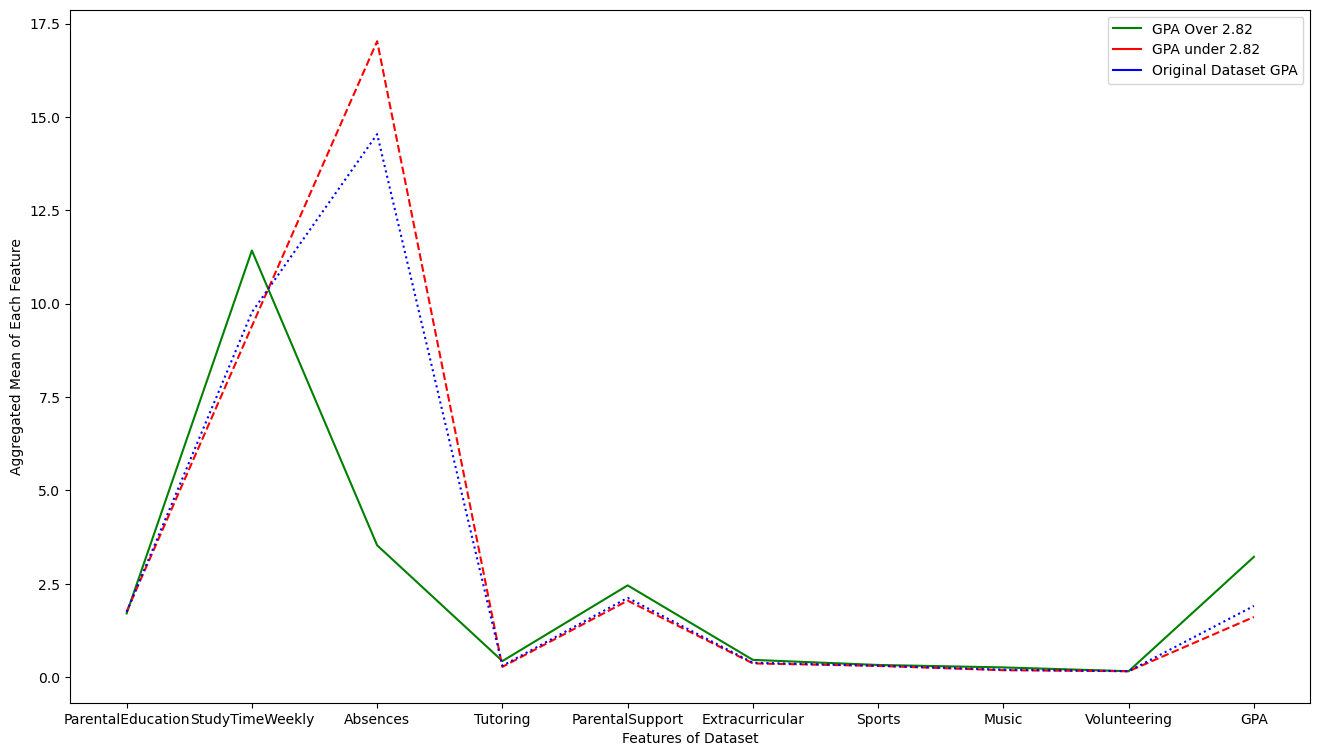

In [9]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(high_gpa_df.agg('mean').drop('GradeClass'),color='Green')
sns.lineplot(lower_gpa_df.agg('mean').drop('GradeClass'),color='Red')
sns.lineplot(stud_df.agg('mean').drop('GradeClass'),color='Blue')
ax.legend(handles=ax.lines, labels=['GPA Over 2.82','GPA under 2.82','Original Dataset GPA'])
ax.lines[1].set_linestyle('--')
ax.lines[2].set_linestyle(':')
ax.set_xlabel('Features of Dataset')
ax.set_ylabel('Aggregated Mean of Each Feature')

For students performing well in GPA, there is more of a difference in study time, and parental support.

In [10]:
stud_df[['ParentalSupport','GPA','StudyTimeWeekly','Absences']].agg(['mean','std','median'])

,ParentalSupport,GPA,StudyTimeWeekly,Absences
mean,2.122074,1.906186,9.771992,14.541388
std,1.122813,0.915156,5.652774,8.467417
median,2.000000,1.893393,9.705363,15.000000


I want to look at who has a high parental support to see if there is any other contributing factors.

In [11]:
pare_care_df = stud_df[stud_df['ParentalSupport']>=3]

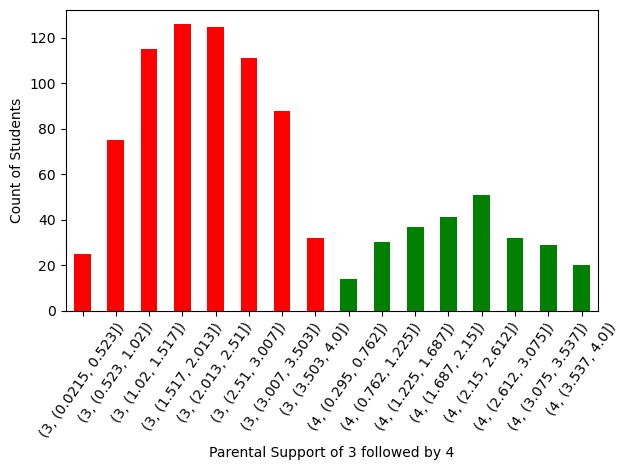

In [44]:
colors=(['r']*8)+(['g']*8)
pare_care_df.groupby('ParentalSupport')['GPA'].value_counts(bins=8).sort_index().plot(kind='bar',stacked=True,color=colors)
plt.xticks(rotation=55)
plt.xlabel('Parental Support of 3 followed by 4')
plt.ylabel('Count of Students')
plt.tight_layout()

             self        other
count  951.000000  2392.000000
mean     2.082241     1.906186
std      0.888088     0.915156
min      0.026469     0.000000
25%      1.396347     1.174803
50%      2.096033     1.893393
75%      2.772276     2.622216


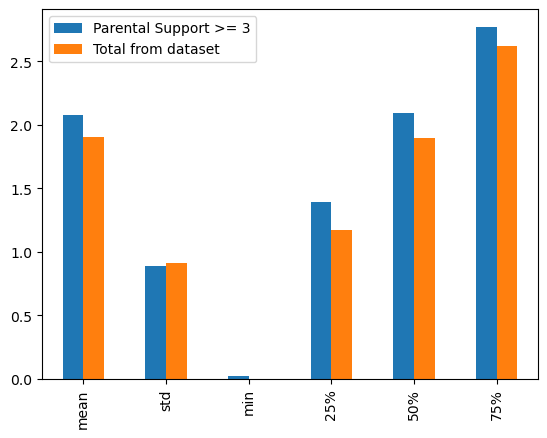

In [26]:
pare_care_df['GPA'].describe().compare(stud_df['GPA'].describe()).drop('count').plot(kind='bar')
plt.legend(['Parental Support >= 3','Total from dataset'])
print(pare_care_df['GPA'].describe().compare(stud_df['GPA'].describe()))

In [37]:
print(high_gpa_df.agg('mean')-lower_gpa_df.agg('mean'))
print(high_gpa_df.agg('mean')-stud_df.agg('mean'))

ParentalEducation    -0.050295
StudyTimeWeekly       2.026175
Absences            -13.502409
Tutoring              0.155891
ParentalSupport       0.409140
Extracurricular       0.094351
Sports                0.025442
Music                 0.075520
Volunteering         -0.000893
GPA                   1.611117
GradeClass           -2.212456
dtype: float64
ParentalEducation    -0.041022
StudyTimeWeekly       1.652620
Absences            -11.013043
Tutoring              0.127150
ParentalSupport       0.333709
Extracurricular       0.076956
Sports                0.020751
Music                 0.061597
Volunteering         -0.000728
GPA                   1.314084
GradeClass           -1.804557
dtype: float64
